In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df = df.drop(['Unnamed: 0',"index"], axis=1)

## Stats

In [4]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [266]:
df.describe(include=object)

,date,cheveux,sexe,diplome,specialite,dispo
count,19909,19897,19900,19890,19907,19894
unique,1826,4,2,4,4,2
top,2012-02-03,chatain,M,master,geologie,non
freq,24,6022,11889,7513,10028,11848


In [267]:
df.describe()

,age,exp,salaire,note,embauche
count,19909.000000,19904.000000,19905.000000,19886.000000,20000.000000
mean,35.004521,9.500352,34974.343934,75.168762,0.114600
std,9.609169,3.012109,5003.099616,17.095926,0.318547
min,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,29.000000,7.000000,31596.000000,63.720000,0.000000
50%,35.000000,9.000000,34979.000000,75.080000,0.000000
75%,41.000000,12.000000,38358.000000,86.617500,0.000000
max,74.000000,23.000000,53977.000000,143.220000,1.000000


In [268]:
print('Nans Percentage :\n')
for col in list(df):
    nbr = df[col].isna().sum()
    if nbr != 0:
        print("{} : {} ==> {:.2f} %".format(col,df[col].isna().sum(),100.0*df[col].isna().sum()/df[col].shape[0]))

Nans Percentage :

date : 91 ==> 0.46 %
cheveux : 103 ==> 0.52 %
age : 91 ==> 0.46 %
exp : 96 ==> 0.48 %
salaire : 95 ==> 0.47 %
sexe : 100 ==> 0.50 %
diplome : 110 ==> 0.55 %
specialite : 93 ==> 0.47 %
note : 114 ==> 0.57 %
dispo : 106 ==> 0.53 %


In [269]:
print('Values : \n')
for i in list(df):
    print(i + ': ' + str(df[i].unique()), end="\n\n")

Values : 

date: ['2012-06-02' '2011-04-21' '2012-09-07' ... '2011-03-04' '2014-08-26'
 '2011-07-11']

cheveux: ['roux' 'blond' 'brun' 'chatain' nan]

age: [25. 35. 29. nan 37. 33. 31. 43. 28. 50. 44. 39. 23. 38. 30. 42. 27. 19.
 40. 49. 26. 59. 41. 34. 24. 16. 36. 48. 47. 53. 20. 22. 54. 46. 45. 61.
 21. 56. 14. 32. 55. 52. 65. 10. 51. 17. 12. 13.  8. 15. 57. 62. 18. 58.
  5. 67. 63.  6.  9. 11.  3. -1. 69. 64.  4. 60.  2.  7. -3. 72. 66. 71.
  0. 74.  1. 68. -2.]

exp: [ 9. 13. 12.  6.  8. 10. 11.  4. 14.  3.  7. 15.  5. 16.  2. 17.  0. nan
  1. 21. 18. 19. 20. -1. 23. -2.]

salaire: [26803. 38166. 35207. ... 39591. 41107. 44499.]

sexe: ['F' 'M' nan]

diplome: ['licence' 'master' 'doctorat' 'bac' nan]

specialite: ['geologie' 'forage' 'detective' 'archeologie' nan]

note: [ 97.08  63.86  78.5  ...  23.51 103.48  45.62]

dispo: ['non' 'oui' nan]

embauche: [0 1]



## Preprocess 

In [5]:
df.dropna(inplace=True)

In [6]:
df.date = pd.to_datetime(df.date)

In [300]:
df.loc[df.age<18,'age'] = df.age.mean()

df.loc[df.exp<0,'exp'] = df.exp.mean()

## Analysis 

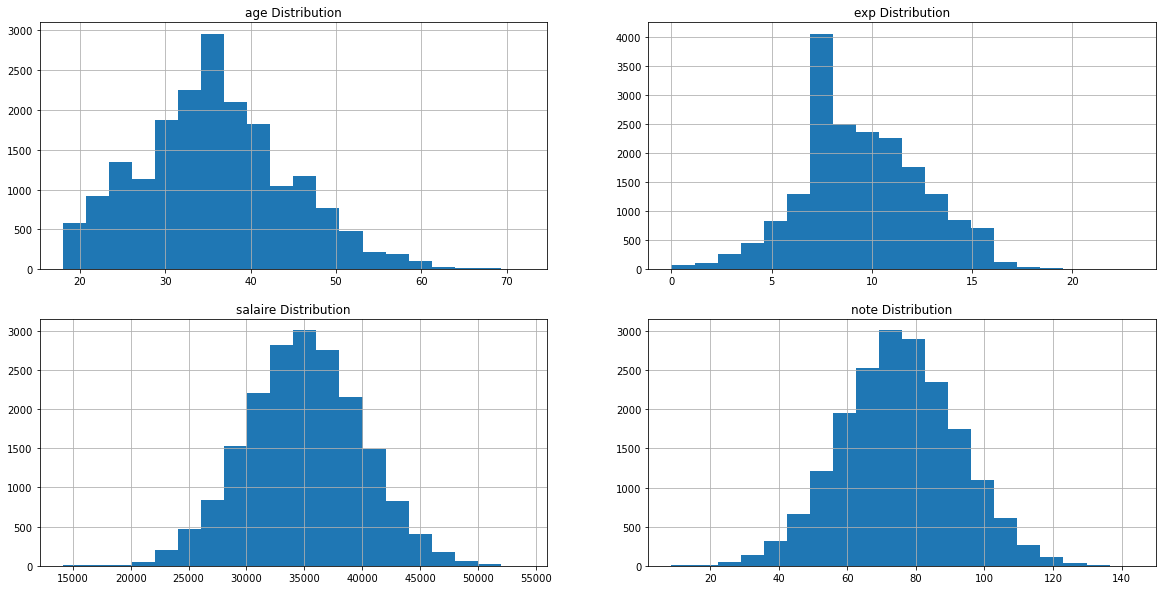

In [273]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['age','exp','salaire','note']):
    plt.subplot(2,2,i+1)
    plt.title(f"{col} Distribution")
    df[col].hist(bins=20)

<AxesSubplot:ylabel='embauche'>

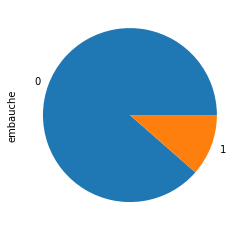

In [274]:
df.embauche.value_counts().plot.pie()

<b> On remarque qu'on a une dataset déséquilibré.

<AxesSubplot:>

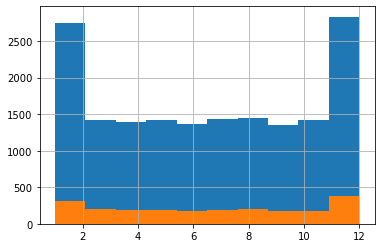

In [275]:
df[df.embauche==0].date.dt.month.hist()
df[df.embauche==1].date.dt.month.hist()

<b> Pour le champs Date on remque une augmentation dans le nombre de recrutement dans la période de début et fin d'année

<AxesSubplot:title={'center':'Nbr Non Embauché mois'}>

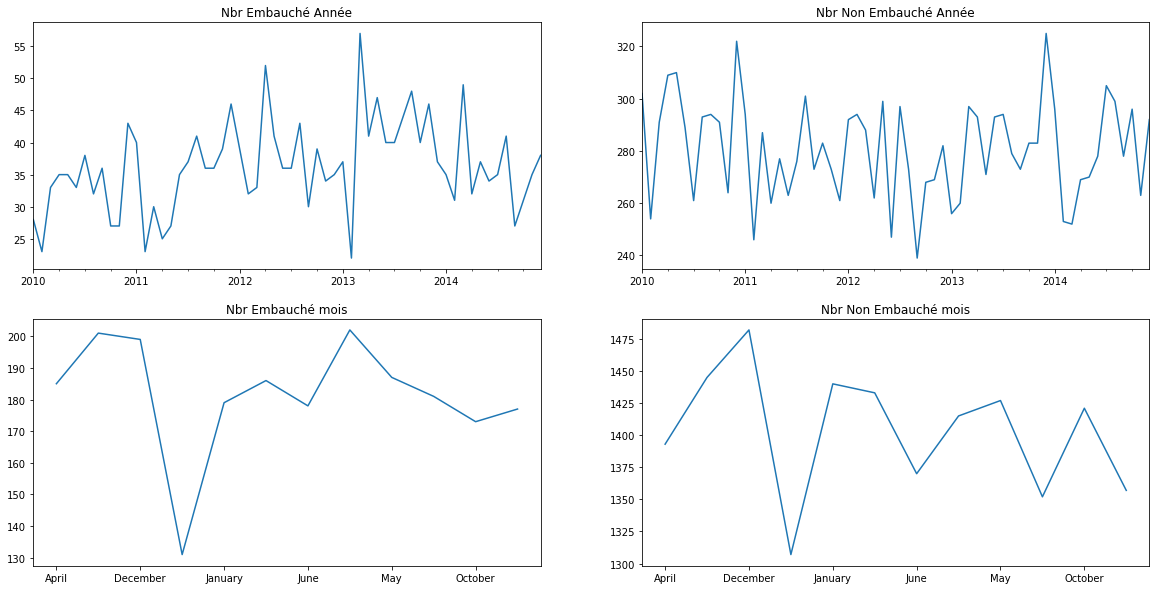

In [276]:
date_1 = df[df.embauche==1].date.dt.month_name().value_counts()
date_0 = df[df.embauche==0].date.dt.month_name().value_counts()
date_0_y = df[df.embauche==0].date.dt.to_period('M').value_counts()
date_1_y = df[df.embauche==1].date.dt.to_period('M').value_counts()

date_1_y = date_1_y.sort_index()
date_0_y = date_0_y.sort_index()
date_1 = date_1.sort_index()
date_0 = date_0.sort_index()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

plt.title("Nbr Embauché Année")
date_1_y.plot()
plt.subplot(2,2,2)
plt.title("Nbr Non Embauché Année")
date_0_y.plot()
plt.subplot(2,2,3)
plt.title("Nbr Embauché mois")
date_1.plot()
plt.subplot(2,2,4)
plt.title("Nbr Non Embauché mois")
date_0.plot()


<b>Pour le champs Date j'ai pensé à prendre que le mois car on remarque une saisonalité sur le nombre de recrutement

<AxesSubplot:>

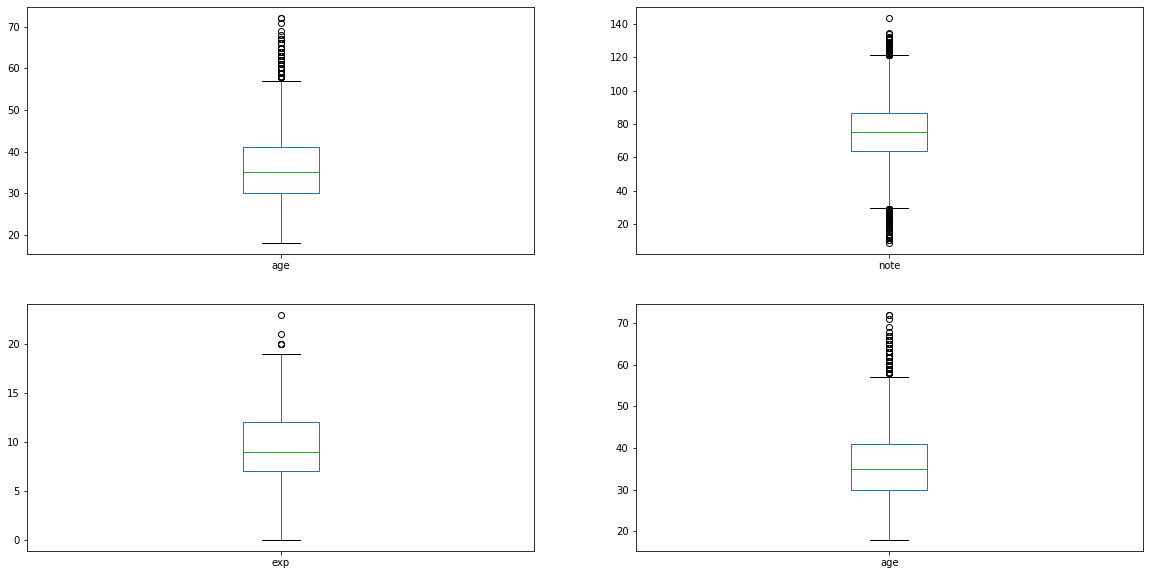

In [449]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df["age"].plot.box()
plt.subplot(2,2,2)
df["note"].plot.box()
plt.subplot(2,2,3)
df["exp"].plot.box()
plt.subplot(2,2,4)
df["age"].plot.box()

<b>on remarque des outliers qu'on doit corriger

In [301]:
temp = df.copy()

In [302]:
labelencoder = LabelEncoder()
temp.sexe = labelencoder.fit_transform(df.sexe)
temp.dispo = labelencoder.fit_transform(df.dispo)
temp.cheveux = labelencoder.fit_transform(df.cheveux)
temp.diplome = labelencoder.fit_transform(df.diplome)
temp.specialite = labelencoder.fit_transform(df.specialite)

In [303]:
corr = temp.drop(['embauche'],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo
cheveux,1.00,0.01,0.01,0.02,-0.10,-0.07,-0.04,0.01,0.03
age,0.01,1.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,-0.01
exp,0.01,-0.01,1.00,0.01,0.00,-0.00,-0.00,-0.01,-0.00
salaire,0.02,0.00,0.01,1.00,0.13,-0.15,-0.13,-0.45,0.18
sexe,-0.10,-0.00,0.00,0.13,1.00,-0.01,0.37,-0.27,0.07
diplome,-0.07,0.00,-0.00,-0.15,-0.01,1.00,-0.04,0.21,0.16
specialite,-0.04,0.01,-0.00,-0.13,0.37,-0.04,1.00,-0.17,-0.38
note,0.01,-0.00,-0.01,-0.45,-0.27,0.21,-0.17,1.00,0.34
dispo,0.03,-0.01,-0.00,0.18,0.07,0.16,-0.38,0.34,1.00


<b> on remarque qu'il n'y a pas de corelation apparente entre les différentes variables 

In [304]:
depends,_ = chi2(temp.drop(['embauche','date'],axis=1), temp.embauche)

print(np.array(temp.drop(['embauche','date'],axis=1).columns)[depends.argsort()])

['note' 'cheveux' 'exp' 'dispo' 'age' 'specialite' 'sexe' 'diplome'
 'salaire']


<b>la décision d'embauche dépends principalement de ces variables par ordre décroissant

### Q1 La spécialité et le sexe

In [280]:
corr = temp[["specialite","sexe"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,specialite,sexe
specialite,1.00,0.37
sexe,0.37,1.00


<b>On obsérve une légére corrélation entre ces deux variables

### Q2 cheveux et le salaire

In [284]:
corr = temp[["cheveux","salaire"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,cheveux,salaire
cheveux,1.00,0.02
salaire,0.02,1.00


### Q3 expérience et la note

In [285]:
corr = temp[["exp","note"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,exp,note
exp,1.00,-0.01
note,-0.01,1.00


## Processing 

In [315]:
df['age'] = pd.cut(x=df['age'], bins=[17, 30, 45, 65, 75],labels=[1,2,3,4])
df['exp'] = pd.cut(x=df['exp'], bins=[-1, 5, 10, 23],labels=[1,2,3])
df['salaire'] = pd.cut(x=df['salaire'], bins=range(14000,64000,10000),labels=[1,2,3,4])

In [305]:
labelencoder = LabelEncoder()
df.sexe = labelencoder.fit_transform(df.sexe)
df.dispo = labelencoder.fit_transform(df.dispo)
df.cheveux = labelencoder.fit_transform(df.cheveux)
df.diplome = labelencoder.fit_transform(df.diplome)
df.specialite = labelencoder.fit_transform(df.specialite)

In [306]:
df.date = df.date.dt.month

## Models

In [316]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['embauche'],axis=1),df["embauche"],stratify=df["embauche"],random_state = 0)

In [313]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[3760  451]
 [ 163  382]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4211
           1       0.46      0.70      0.55       545

    accuracy                           0.87      4756
   macro avg       0.71      0.80      0.74      4756
weighted avg       0.90      0.87      0.88      4756



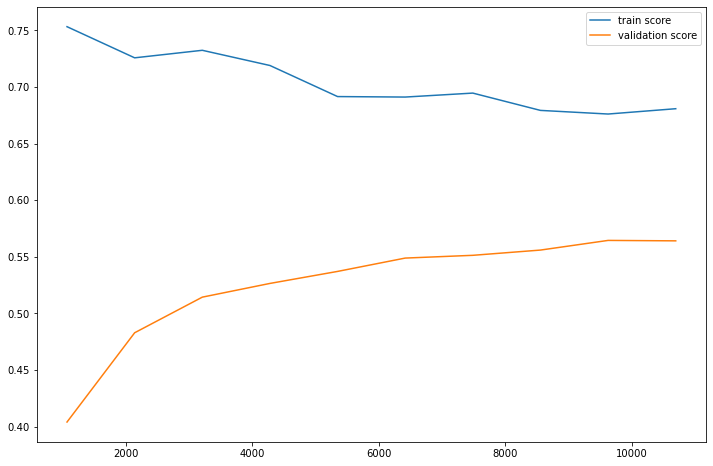

In [372]:
RFC = RandomForestClassifier(n_estimators=200, 
                            max_depth=20,
                            max_features='auto', 
                            min_samples_leaf=10,
                            min_samples_split=12,
                             class_weight='balanced',
                             random_state=0)
evaluation(RFC)

<b> variables les plus signifiantes pour le modéle

In [292]:
selector = SelectFromModel(RFC, threshold='mean')
selector.fit(x_train, y_train)

np.array(x_train.columns)[selector.get_support()]

array(['date', 'cheveux', 'note'], dtype=object)